In [1]:
using PGFPlots

In [10]:
path = "Data/Sep1/Ad05RTheta1RSteer05Abs0FR200/"
# policies = readdir("Policy")
# pnames = []
# for i = 1:length(policies)
#     if policies[i] != ".DS_Store"
#         push!(pnames,policies[i][1:length(policies[i])-4])
#     end
# end
# println(pnames)

pnames = ["b_10e3","rarl_1e3","fsp_1e3","mpc"]
legends = ["b 1e3","rarl 1e3","fsp 1e3","mpc"]

4-element Array{String,1}:
 "b 1e3"   
 "rarl 1e3"
 "fsp 1e3" 
 "mpc"     

In [11]:
colors = ["black","blue","red","orange"]
# colors = ["blue","red"]

4-element Array{String,1}:
 "black" 
 "blue"  
 "red"   
 "orange"

In [12]:
# policies = ["Baseline/Rewards/b_15e3_3","Retrain/Rewards/rarl","Retrain/Rewards/rarlP10",
#             "FSP/Rewards/nBnoTR","FSP/Rewards/nBnoTRP10"]

## Multi-Pareto 

In [13]:
plots_r = Array{PGFPlots.Plots.Linear}(0)
plots_cr = Array{PGFPlots.Plots.Linear}(0)

for i = 1:length(pnames)
    policy = pnames[i]
    rewards = Array{Float64}(0)
    reward_errs = Array{Float64}(0)
    collision_rates = Array{Float64}(0)
    for alpha in 1:10
        reward=readdlm(string(path,"Pareto/",policy,"_rewards_d_pareto",alpha,".txt"))
        collision_rate=readdlm(string(path,"Pareto/",policy,"_collision_rate_pareto",alpha,".txt"))
        push!(rewards,mean(reward))
        push!(reward_errs,std(reward)/sqrt(length(reward)))
        push!(collision_rates,mean(collision_rate))
    end
    
    push!(plots_r,Plots.Linear(1:10, rewards, legendentry=legends[i],style=string(colors[i],",very thick"),mark="o",errorBars = ErrorBars(y=reward_errs)))
#     push!(plots_r,Plots.Linear(1:10, rewards, legendentry=legends[i],style=string(colors[i],",very thick"),mark="o"))
    push!(plots_cr,Plots.Linear(1:10, collision_rates, legendentry=legends[i],style=string(colors[i],",very thick"),mark="o"))
end

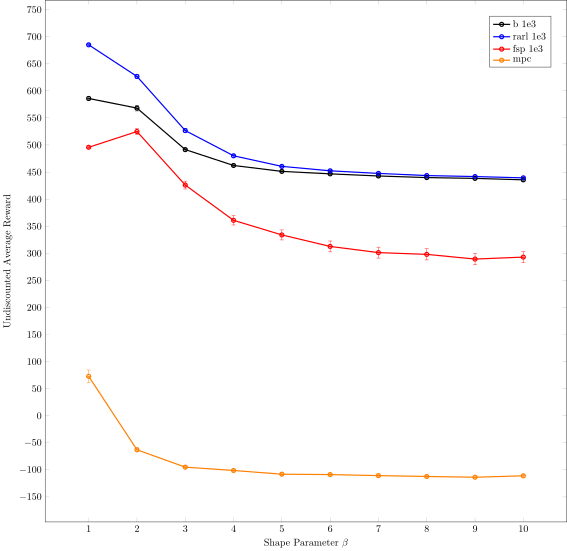

In [14]:
a=Axis(plots_r, legendPos="north east",width="20cm", height="20cm",
    xlabel=L"Shape Parameter $\beta$",ylabel="Undiscounted Average Reward")

In [15]:
# save(string(prepath,"Plot/ParetoReward.svg"),a)
save(string(path,"Plot/Pareto/reward.pdf"),a)
# save(string(prepath,"Plot/ParetoReward.tex"),a)

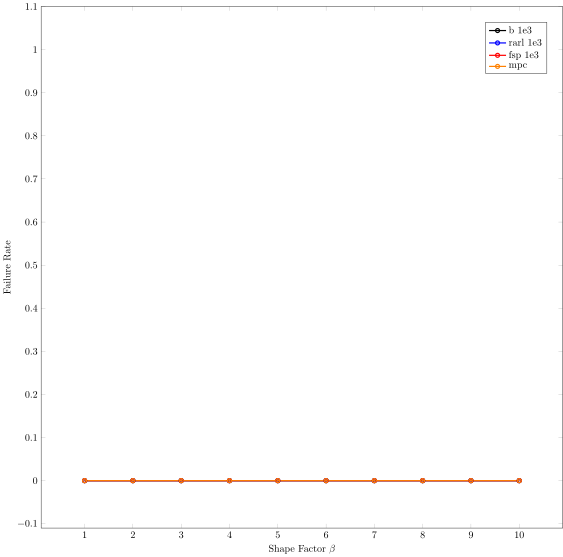

In [16]:
a=Axis(plots_cr, legendPos="north east",width="20cm", height="20cm",ymax=1.1,
    xlabel=L"Shape Factor $\beta$",ylabel="Failure Rate")

In [17]:
# save(string(prepath,"Plot/ParetoCR.svg"),a)
save(string(path,"Plot/Pareto/failure.pdf"),a)
# save(string(prepath,"Plot/ParetoCR.tex"),a)